<a href="https://colab.research.google.com/github/knithwa/FinSearch_MidTerm/blob/main/RL_FInSearch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
!pip install gym-anytrading
!pip install 'shimmy>=0.2.1'
!pip install stable_baselines3

In [79]:
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
from stable_baselines3 import DQN
from stable_baselines3 import PPO


# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [80]:
df = pd.read_csv('/content/Nifty_data.csv')

In [81]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0


In [82]:
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [55]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [56]:
df.set_index('Date', inplace=True)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0


In [57]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/loc

In [58]:
env.signal_features

array([[ 5.23220020e+03,  0.00000000e+00],
       [ 5.27789990e+03,  4.56997070e+01],
       [ 5.28179980e+03,  3.89990300e+00],
       [ 5.26310010e+03, -1.86997070e+01],
       [ 5.24475000e+03, -1.83500980e+01],
       [ 5.24939990e+03,  4.64990200e+00],
       [ 5.21039990e+03, -3.90000000e+01],
       [ 5.23395020e+03,  2.35502930e+01],
       [ 5.25989990e+03,  2.59497070e+01],
       [ 5.25220020e+03, -7.69970700e+00],
       [ 5.27485010e+03,  2.26499030e+01],
       [ 5.22564990e+03, -4.92001960e+01],
       [ 5.22170020e+03, -3.94970700e+00],
       [ 5.09414990e+03, -1.27550293e+02],
       [ 5.03600000e+03, -5.81499020e+01],
       [ 5.00789990e+03, -2.81000980e+01],
       [ 4.85310010e+03, -1.54799804e+02],
       [ 4.86725000e+03,  1.41499020e+01],
       [ 4.88204980e+03,  1.47998050e+01],
       [ 4.89970020e+03,  1.76503900e+01],
       [ 4.83010010e+03, -6.96000970e+01],
       [ 4.93185010e+03,  1.01750000e+02],
       [ 4.84535010e+03, -8.65000000e+01],
       [ 4.

In [59]:
env.action_space

Discrete(2)

info {'total_reward': -350.1499020000001, 'total_profit': 0.8855698515457465, 'position': 1}


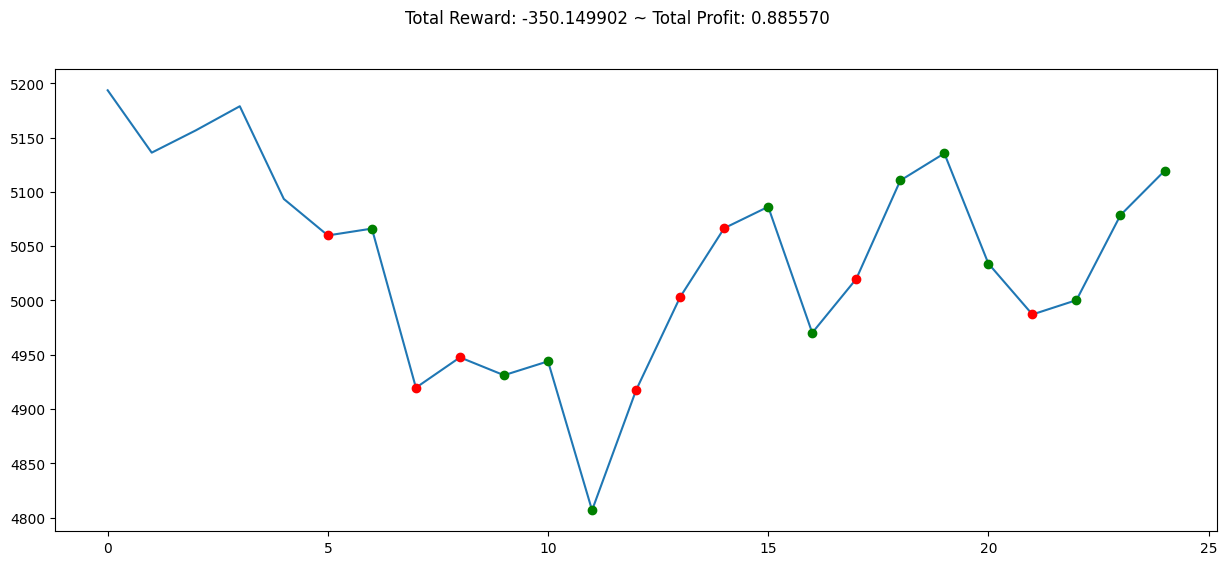

In [83]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [84]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])
env

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/stable_

#A2C


In [89]:
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=1000)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | -41.9     |
| time/                 |           |
|    fps                | 998       |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -0.0632   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | 0.000101  |
|    value_loss         | 9.25e-05  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | -34.9    |
| time/                 |          |
|    fps                | 983      |
|    iterations         | 200      |
|

#DQN


In [90]:
model = DQN("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=1000, log_interval=4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19       |
|    ep_rew_mean      | 20       |
|    exploration_rate | 0.278    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 10466    |
|    time_elapsed     | 0        |
|    total_timesteps  | 76       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19       |
|    ep_rew_mean      | 66.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 9910     |
|    time_elapsed     | 0        |
|    total_timesteps  | 152      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19       |
|    ep_rew_mean      | 18.6   

#PPO

In [93]:
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=1000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19       |
|    ep_rew_mean     | -19.9    |
| time/              |          |
|    fps             | 1797     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------


In [94]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -35.04980499999965, 'total_profit': 0.9499262881634842, 'position': 0}


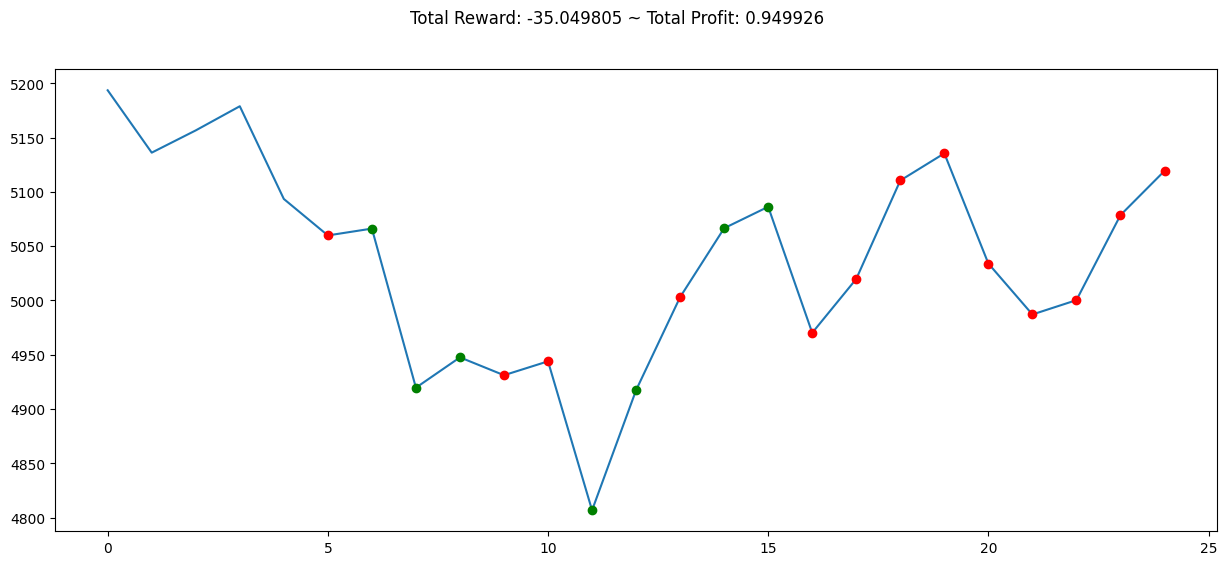

In [95]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()